In [1]:
%load_ext autoreload
%autoreload 1
import pandas as pd
import os
import sys
sys.path.append('/home/r10user10/Documents/Jiacheng/dspm-auton-survival')
from mimic3benchmarks.mimic3models.preprocessing import Discretizer
import numpy as np
import pickle
from tqdm import tqdm

In [2]:
def convert_pkl_into_numpy(pkl_file):
    with open(pkl_file, 'rb') as f:
        data = pickle.load(f)

    X_train = []
    t_train = []
    e_train = []

    for i in tqdm(range(len(data))):
        X_train.append(data[i]["reg_ts"])
        t_train.append(data[i]["survival_time"])
        e_train.append(data[i]["label"])

    X_train = np.array(X_train)
    t_train = np.array(t_train)
    e_train = np.array(e_train)

    return X_train, t_train, e_train

In [3]:
data_path = "/data1/r10user2/EHR_dataset/output_mimic4/survival"

X_train, t_train, e_train = convert_pkl_into_numpy(
    os.path.join(data_path, "norm_ts_train.pkl"))
# X_val, t_val, e_val = convert_pkl_into_numpy(os.path.join(data_path, "val.pkl"))
X_test, t_test, e_test = convert_pkl_into_numpy(os.path.join(data_path, "norm_ts_test.pkl"))

100%|██████████| 4972/4972 [00:00<00:00, 1299238.64it/s]


In [4]:
neg_indices = np.where(t_train <= 0)[0]
t_train = np.delete(t_train, neg_indices)
e_train = np.delete(e_train, neg_indices)
x_train = np.delete(X_train, neg_indices, axis=0)

neg_indices = np.where(t_test <= 0)[0]
t_test = np.delete(t_test, neg_indices)
e_test = np.delete(e_test, neg_indices)
x_test = np.delete(X_test, neg_indices, axis=0)

In [5]:
np.save("x_train.npy", x_train)
np.save("t_train.npy", t_train)
np.save("e_train.npy", e_train)

# np.save("x_val.npy", X_val)
# np.save("t_val.npy", t_val)
# np.save("e_val.npy", e_val)

np.save("x_test.npy", x_test)
np.save("t_test.npy", t_test)
np.save("e_test.npy", e_test)

In [6]:

# dir_path = '/disk1/fywang/EHR_dataset/mimiciv_benchmark/survival_prediction'

# train_path = os.path.join(dir_path , 'train_listfile.csv')
# test_path = os.path.join(dir_path , 'test_listfile.csv')

# train_df = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)

# x_train = []
# del_data = 0
# for patient_path in tqdm(train_df['stay']):
#     patient_path = os.path.join(dir_path, 'train', patient_path)
#     patient = pd.read_csv(patient_path)
#     patient = patient.fillna('')
#     data_processor = Discretizer(impute_strategy='normal_value')
#     data = data_processor.transform(np.array(patient))[0]
#     if data.shape[0]  < 60:
#         num_pad = 60 - data.shape[0]
#         #print(num_pad)
#         last_data = data[-1].repeat(num_pad,axis=0).reshape(-1,76)
#         #print(last_data.shape)
#         data = np.concatenate([data, last_data])

#     if data.shape[0] == 60:
#         x_train.append(data)
#     else:
#         del_data += 1
       
# print(del_data) 
    

In [7]:
# x_train = np.array(x_train)
# t_train = np.array(train_df['survival_time'])
# e_train = np.array(train_df['censor'])
# np.save("x_train.npy", x_train)
# np.save("t_train.npy", t_train)
# np.save("e_train.npy", e_train)

In [8]:
t_train

array([ 47.38      , 119.7       ,  22.63472222, ...,  48.59055556,
        32.99166667,  16.94916667])

In [9]:
# x_test = []
# del_data = 0
# for patient_path in tqdm(test_df['stay']):
#     patient_path = os.path.join(dir_path, 'test', patient_path)
#     patient = pd.read_csv(patient_path)
#     patient = patient.fillna('')
#     data_processor = Discretizer(impute_strategy='normal_value')
#     data = data_processor.transform(np.array(patient))[0]
#     if data.shape[0]  < 60:
#         num_pad = 60 - data.shape[0]
#         #print(num_pad)
#         last_data = data[-1].repeat(num_pad,axis=0).reshape(-1,76)
#         #print(last_data.shape)
#         data = np.concatenate([data, last_data])

#     if data.shape[0] == 60:
#         x_test.append(data)
#     else:
#         del_data += 1
       
# print(del_data) 

In [10]:
# x_test = np.array(x_test)
# t_test = np.array(test_df['survival_time'])
# e_test = np.array(test_df['censor'])
# np.save("x_test.npy", x_test)
# np.save("t_test.npy", t_test)
# np.save("e_test.npy", e_test)

In [11]:
print(x_train.shape)
print(t_train.shape)

(17961, 48, 30)
(17961,)


In [12]:
import numpy as np
x_train = np.load('x_train.npy')
t_train = np.load('t_train.npy')
e_train = np.load('e_train.npy')

neg_indices = np.where(t_train <= 0)[0]
t_train = np.delete(t_train, neg_indices)
e_train = np.delete(e_train, neg_indices)
x_train = np.delete(x_train, neg_indices, axis=0)

np.save("x_train.npy", x_train)
np.save("t_train.npy", t_train)
np.save("e_train.npy", e_train)

print(x_train.shape)
print(t_train.shape)
print(e_train.shape)

(17961, 48, 30)
(17961,)
(17961,)


In [13]:
x_test = np.load('x_test.npy')
t_test = np.load('t_test.npy')
e_test = np.load('e_test.npy')

neg_indices = np.where(t_test <= 0)[0]
t_test = np.delete(t_test, neg_indices)
e_test = np.delete(e_test, neg_indices)
x_test = np.delete(x_test, neg_indices, axis=0)

np.save("x_test.npy", x_test)
np.save("t_test.npy", t_test)
np.save("e_test.npy", e_test)

print(x_test.shape)
print(t_test.shape)
print(e_test.shape)

(4952, 48, 30)
(4952,)
(4952,)


In [14]:
models = []

from auton_survival.models.dsm import DeepRecurrentSurvivalMachines
from auton_survival.models.dsm import DeepSurvivalMachines

# model = DeepRecurrentSurvivalMachines(k=3,
#                distribution='LogNormal',
#                layers=10)
model = DeepSurvivalMachines(
    k=4,
    distribution="LogNormal",
    layers=[76]
)
# The fit method is called to train the model
model.fit(x_train, t_train, e_train, iters=1, learning_rate=1e-5)

/home/r10user10/Documents/anaconda3/envs/python310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (48) must match the size of tensor b (100) at non-singleton dimension 1

In [ ]:
trained_weights = model.trained_weights
print(trained_weights.shape)
print(np.isnan(trained_weights).sum())

(1, 425, 4)
0


In [ ]:
horizons = [0.25, 0.5, 0.75]
times = np.quantile(t[e == 1], horizons).tolist()
out_risk = model.predict_risk(x_test, times)
out_survival = model.predict_survival(x_test, times)

from sksurv.metrics import concordance_index_ipcw, brier_score, cumulative_dynamic_auc

cis = []
brs = []

et_train = np.array([(e_train[i], t_train[i]) for i in range(len(e_train))],
                 dtype = [('e', bool), ('t', float)])
et_test = np.array([(e_test[i], t_test[i]) for i in range(len(e_test))],
                 dtype = [('e', bool), ('t', float)])
# et_val = np.array([(e_val[i], t_val[i]) for i in range(len(e_val))],
#                  dtype = [('e', bool), ('t', float)])

for i, _ in enumerate(times):
    cis.append(concordance_index_ipcw(et_train, et_test, out_risk[:, i], times[i])[0])
brs.append(brier_score(et_train, et_test, out_survival, times)[1])
roc_auc = []
for i, _ in enumerate(times):
    roc_auc.append(cumulative_dynamic_auc(et_train, et_test, out_risk[:, i], times[i])[0])
for horizon in enumerate(horizons):
    print(f"For {horizon[1]} quantile")
    print("TD Concordance Index:", cis[horizon[0]])
    print("Brier Score:", brs[0][horizon[0]])
    print("ROC AUC ", roc_auc[horizon[0]][0], "\n")

NameError: name 't' is not defined

IndexError: index 97 is out of bounds for axis 0 with size 1

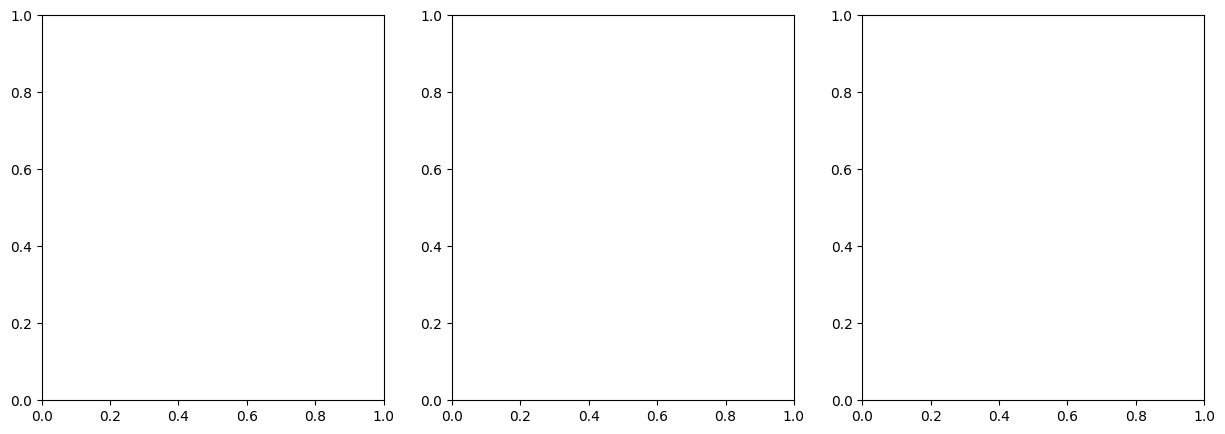

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figs, axes = plt.subplots(1, 3, figsize=(15, 5))
iter_idx = [97, 98, 99]

for idx in range(3):
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 0], fill=True, ax=axes[idx])
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 1], fill=True, ax=axes[idx])
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 2], fill=True, ax=axes[idx])
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 3], fill=True, ax=axes[idx])
    axes[idx].set_title(f'Iter {iter_idx[idx]}')
    axes[idx].set_xlim(0.15, 0.4)